In [6]:
import ssl
# For data loading and manipulation
from sklearn.datasets import fetch_openml
import numpy as np

# For building and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluation and visualization
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


In [7]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [5]:
print(X)
print(type(X))
print("Shape of X:", X.shape)

print(y)
print(type(y))
print("Shape of y:", y.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
Shape of X: (70000, 784)
['5' '0' '4' ... '4' '5' '6']
<class 'numpy.ndarray'>
Shape of y: (70000,)


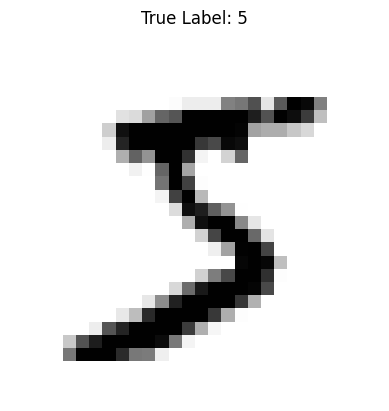

In [11]:
some_digit_index = 0
some_digit_image = X[some_digit_index].reshape(28,28)
true_label = y[some_digit_index]

plt.imshow(some_digit_image, cmap="binary")
plt.title(f"True Label: {true_label}")
plt.axis("off")
plt.show()

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

print("Data has been split and scaled")
print("Training set size:", len(X_train_scaled))
print("Test set size:", len(X_test_scaled))

Data has been split and scaled
Training set size: 60000
Test set size: 10000


In [14]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
softmax_reg.fit(X_train_scaled, y_train)
print("Training Is Complete")

C:\Users\pasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Is Complete


In [15]:
y_pred = softmax_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test set: {accuracy:.4f}")

Model Accuracy on Test set: 0.9258



Displaying Confusion Matrix...
ax: Axes(0.125,0.11;0.775x0.77)


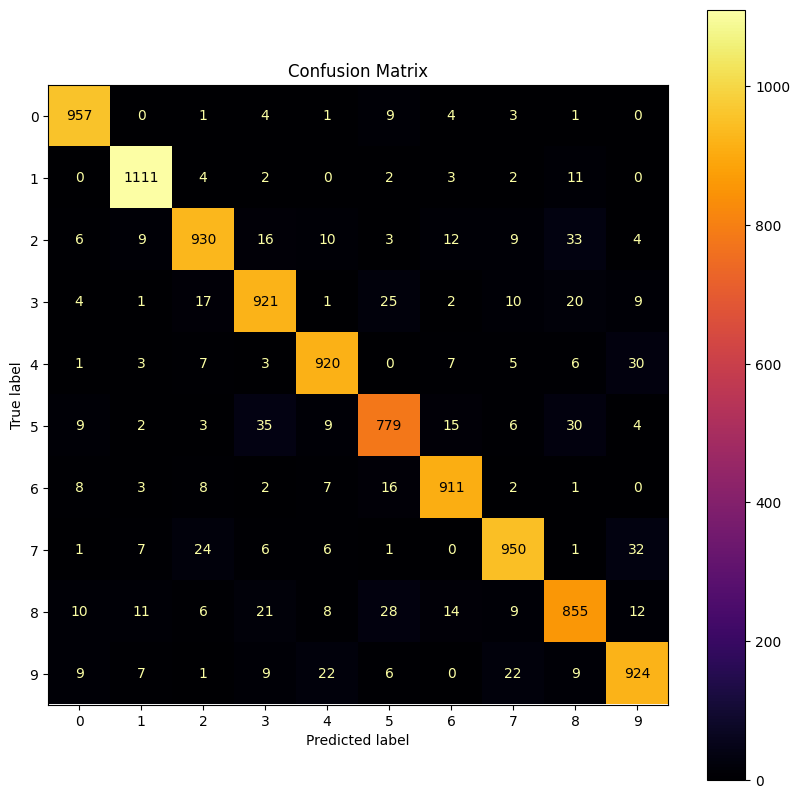

In [18]:
print("\nDisplaying Confusion Matrix...")
fig, ax = plt.subplots(figsize=(10, 10)) 
print("ax:", ax)

ConfusionMatrixDisplay.from_estimator(softmax_reg, X_test_scaled, y_test, ax=ax, cmap="inferno")
plt.title("Confusion Matrix")
plt.show()